/var/folders/q_/52ctm0y10h589cwbbptjsvrw0000gp/T/ipykernel_44395/3250893230.py:51: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


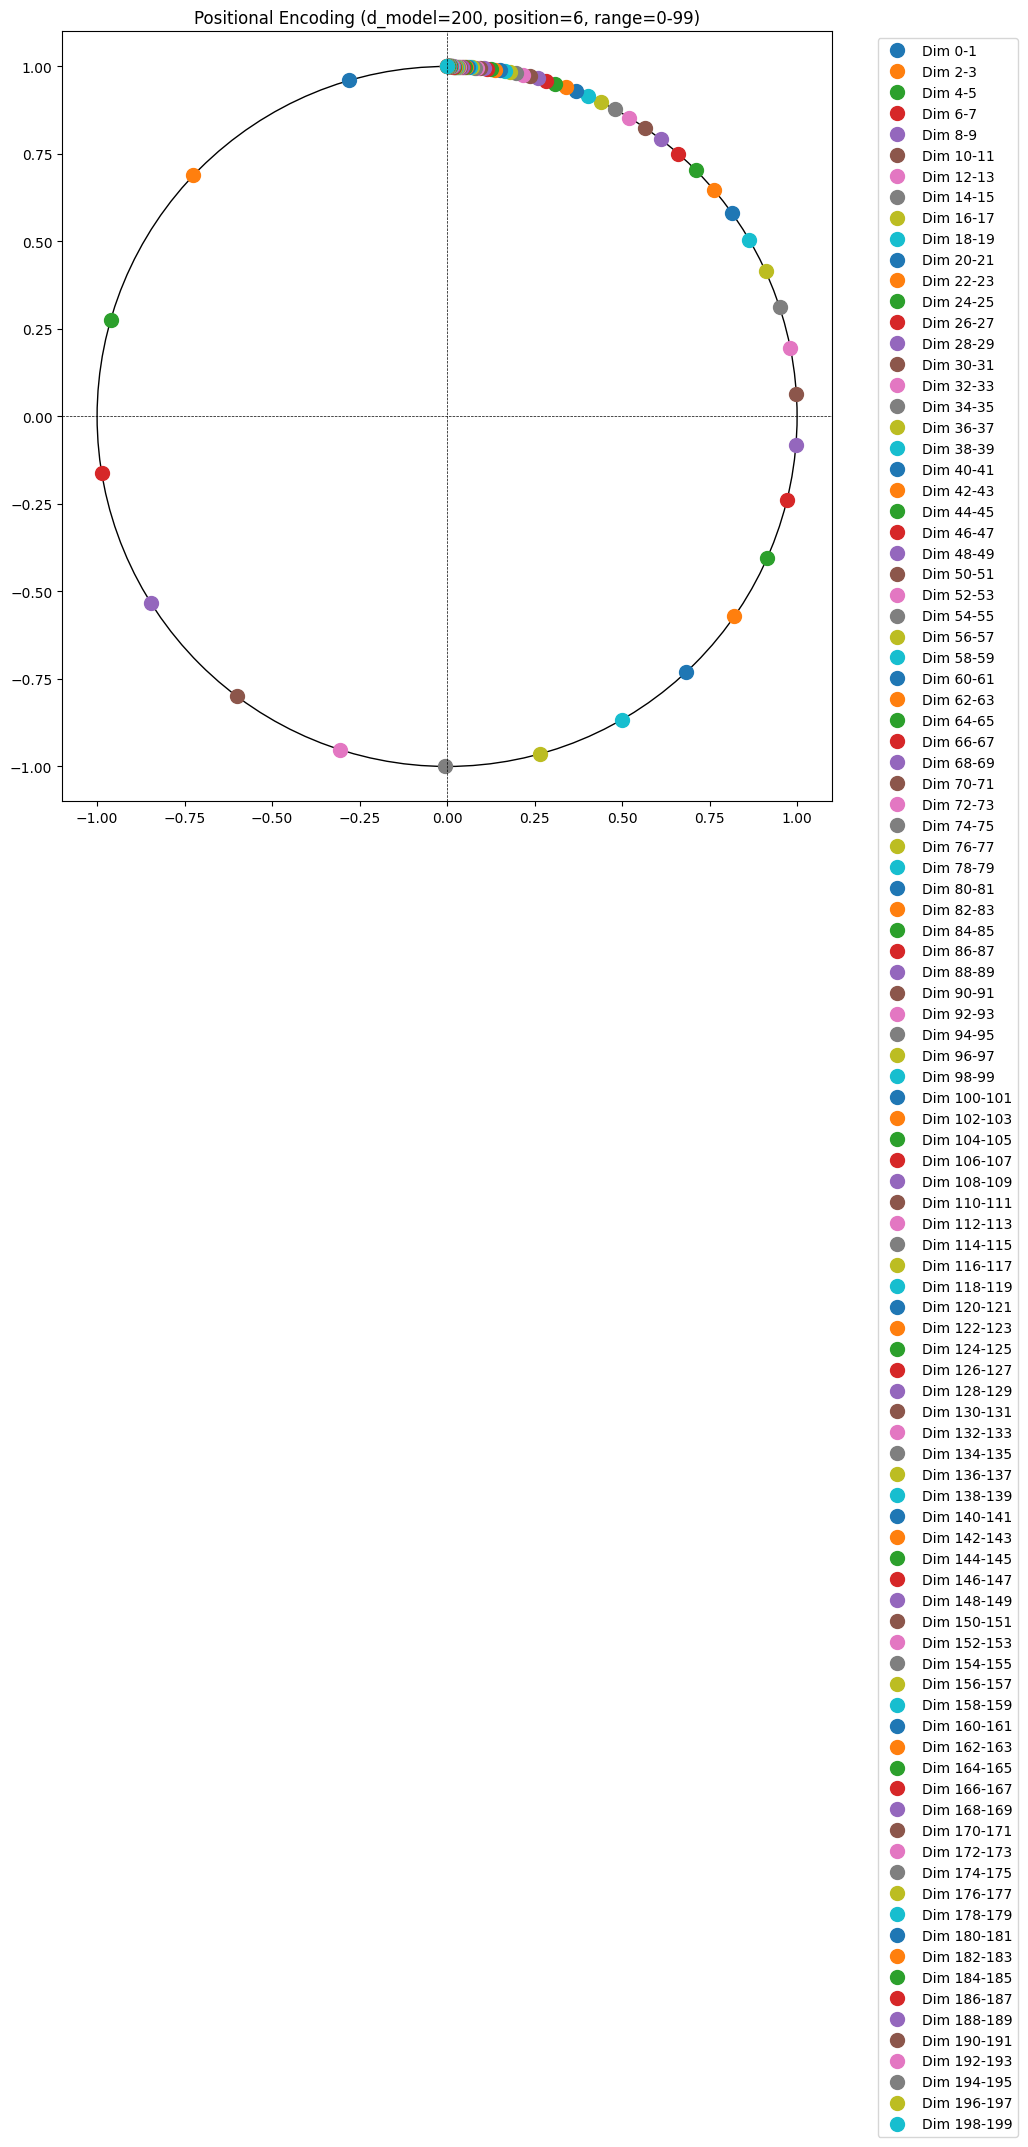

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def positional_encoding(position, d_model):
    if d_model % 2 != 0:
        raise ValueError("d_model must be an even number")

    angles = position / np.power(
        10000, (2 * np.arange(d_model // 2)) / np.float32(d_model)
    )

    sin_values = np.sin(angles)
    cos_values = np.cos(angles)

    return np.column_stack((sin_values, cos_values))


def plot_positional_encoding(d_model, position, start_index=None, end_index=None):
    if d_model % 2 != 0:
        raise ValueError("d_model must be an even number")

    encoding = positional_encoding(position, d_model)

    # 시작 및 끝 인덱스 설정
    start = start_index if start_index is not None else 0
    end = end_index if end_index is not None else d_model // 2
    end = min(end, d_model // 2)  # end_index가 d_model // 2를 초과하지 않도록

    fig, ax = plt.subplots(figsize=(10, 10))

    # 단위 원 그리기
    circle = plt.Circle((0, 0), 1, fill=False)
    ax.add_artist(circle)

    # 각 차원 쌍에 대한 점 찍기
    for i in range(start, end):
        x, y = encoding[i]
        ax.plot(x, y, "o", markersize=10, label=f"Dim {2*i}-{2*i+1}")

    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_aspect("equal", adjustable="box")
    ax.axhline(y=0, color="k", linestyle="--", linewidth=0.5)
    ax.axvline(x=0, color="k", linestyle="--", linewidth=0.5)

    plt.title(
        f"Positional Encoding (d_model={d_model}, position={position}, range={start}-{end-1})"
    )
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()


# 사용 예시
d_model = 200  # 임베딩 벡터의 크기 (짝수여야 함)
position = 6  # 위치

# 모든 차원 표시
plot_positional_encoding(d_model, position)

# 0부터 100까지 표시
# plot_positional_encoding(d_model, position, end_index=101)

# 50부터 100까지 표시
# plot_positional_encoding(d_model, position, start_index=400, end_index=500)